In [1]:
#要開始使用GPU > 執行階段/變更執行階段類型
from tensorflow.keras.datasets.mnist import load_data
# 可以看到load_data()的結構是： ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
#分別用變數設定進去
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#用shape可以看到裡面的筆數ex:x_train > 有60000筆，每筆是28*28的矩陣
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
#用DataFrame印出來，你就可以看到大致的數字形狀
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


5


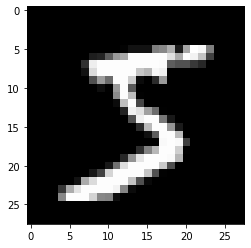

In [4]:
# 用matplotlib畫出來，會用到imshow>cmap用來設定畫出來的顏色
# 顏色代碼>https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 顏色_r: reverse > 把顏色到反過來填,ex:gray_r
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0], cmap="gray")

In [ ]:
# 手動存檔: model.save("2021_11_18_mnist.h5")
# 手動讀檔: from tensorflow.keras.models import load_model
# load_model("h5")
# 不需要再次compile, 可以直接繼續fit/predict

In [14]:
#實作存/讀模型
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
# Dense: 全連接層
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

#如果已經有讀到模型資料>讀取
if os.path.exists("mnist.h5"):
    print("已有存檔, 讀取...")
    model = load_model("mnist.h5")
#如果沒有讀到：建新的，規定規格
else:
    print("沒有存檔, 建個新的...")
    layers = [
        # 784 * 128 + 128(bias)
        Dense(128, activation="relu", input_dim=784),
        # 128 * 10 + 10(bias)
        Dense(10, activation="softmax")
    ]
    model = Sequential(layers)
    model.compile(loss=CategoricalCrossentropy(),
              # "adam"也可以
              optimizer=Adam(),
              metrics=["accuracy"])
model.summary()

已有存檔, 讀取...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# #這裡用的模型是Sequential(序列,有點像堆疊)
# from tensorflow.keras.models import Sequential
# # Dense: 全連接層
# from tensorflow.keras.layers import Dense
# #這裡看API：https://keras.io/zh/layers/core/
# layers = [
#     # 784 * 128 + 128(bias)
#     Dense(128, activation="relu", input_dim=784), #要分成的神經數128,使用的函示:relu,input的神經數784
#     # 128 * 10 + 10(bias)
#     Dense(10, activation="softmax") #要分成神經數:10,使用函示:softmax > 這裡沒有用sigmoid,因為是互斥事件,機率加起來會等於一
# ]
# model = Sequential(layers)
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# # 一個輸出(二元分類): BinaryCrossEntropy p log 1/q + (1 - p) log 1/1-q
# # 多個輸出(多元分類): CategoricalCrossEntropy pi log1/qi
# from tensorflow.keras.losses import CategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam
# # 這裡的loss funtion採用CrossEntropy
# model.compile(loss=CategoricalCrossentropy(),
#               # "adam"也可以用字串來填入optimizer
#               #使用Adam優化器>https://keras.io/zh/optimizers/
#               #讓梯度下降時可以用加速度越過低窪區，加上摩擦力來避免過快
#               optimizer=Adam(),
#               metrics=["accuracy"])

In [7]:
# 做y處理，使用to_to_categorical
# 對y來說, 你要做one-hot encoding
from tensorflow.keras.utils import to_categorical
#做one-hot-encoding > 是否0?是否1?...是否9?
#num_classes > 你有幾種東西? >>> 最好要寫，避免你的資料不到10種
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 做x處理，使用reshape把cuple從28*28調整成784 ，每個除255(圖片數值是0~255，tensorflow希望收斂在-1~1)
# 你可以把一個位置換-1, 代表讓numpy幫你算多少，或你不記得筆數是多少,可以用x_train.shape[0] (實際印出來筆數是60000)
# x_train.reshape(-1, 784) / 255.0
# 如果是文字，用sklearn的minmaxscaler做normalize > 要把min & max記下
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0
# 如果有新的一筆資料，一樣要依原本train的minmaxscaler去做normalize，超過或低於-1~０沒關係,但超出太多,預測值會不准
# x_train_norm[0]

In [9]:
# batch_size: 看多少筆, 做一次梯度下降(常設值：幾10~幾100)
# epochs: 所有資料看幾輪(負責設定結束訓練輪次)
# batch_size=200 >>> 200筆做一次平均梯度
# validation_split:0.1 ，把60000筆資料分成 90%訓練資料(54000筆)、10%驗證資料(6000筆)
# 一epochs: 54000筆 / 200(每200筆做一次梯度下降) = 270 (每輪會做270次梯度下降)
# verbose=0(quiet) 1(default) 2(no bar) >>> 看loss的進度條,bar會分成:訓練loss,訓練acc,驗證loss,驗證acc

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#回調函數,使用兩個函數
#EarlyStopping：patience>如果幾次沒有變好,就會停下 #restore_best_weights>存最終結果
#ModelCheckpoint：副檔名:mdf5或h5 ，用MDFview可以打開，他是一個資料庫，裡面存放係數
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mnist.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train_cat,
          batch_size=200,
          epochs=50,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/50
270/270 - 2s - loss: 0.4375 - accuracy: 0.8785 - val_loss: 0.1991 - val_accuracy: 0.9465 - 2s/epoch - 9ms/step
Epoch 2/50
270/270 - 1s - loss: 0.2078 - accuracy: 0.9410 - val_loss: 0.1419 - val_accuracy: 0.9628 - 1s/epoch - 4ms/step
Epoch 3/50
270/270 - 1s - loss: 0.1535 - accuracy: 0.9560 - val_loss: 0.1252 - val_accuracy: 0.9695 - 1s/epoch - 4ms/step
Epoch 4/50
270/270 - 1s - loss: 0.1221 - accuracy: 0.9653 - val_loss: 0.1055 - val_accuracy: 0.9718 - 1s/epoch - 4ms/step
Epoch 5/50
270/270 - 1s - loss: 0.1007 - accuracy: 0.9712 - val_loss: 0.0956 - val_accuracy: 0.9733 - 1s/epoch - 4ms/step
Epoch 6/50
270/270 - 1s - loss: 0.0846 - accuracy: 0.9756 - val_loss: 0.0909 - val_accuracy: 0.9747 - 1s/epoch - 4ms/step
Epoch 7/50
270/270 - 1s - loss: 0.0724 - accuracy: 0.9789 - val_loss: 0.0861 - val_accuracy: 0.9757 - 1s/epoch - 4ms/step
Epoch 8/50
270/270 - 1s - loss: 0.0628 - accuracy: 0.9822 - val_loss: 0.0852 - val_accuracy: 0.9762 - 1s/epoch - 4ms/step
Epoch 9/50
270/270 - 1s 

In [10]:
model.evaluate(x_test_norm, y_test_cat)
#前面是loss,後面是acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9750


[0.08263802528381348, 0.9750000238418579]

In [11]:
# keras: y_test_cat(已經做過one-hot-encoding) sklearn: y_test
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1) #argmax=indmax,axis=0 從直行找最大值 , axis=1 從橫列找最大值
mat = confusion_matrix(y_test, pre) #混淆矩陣
pd.DataFrame(mat,
             index=["{}(正確)".format(i) for i in range(10)],
             columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),968,0,2,3,1,1,2,1,2,0
1(正確),0,1123,4,0,0,2,2,1,3,0
2(正確),4,1,1004,3,2,1,2,5,9,1
3(正確),0,0,6,986,0,5,0,4,3,6
4(正確),1,0,4,1,960,0,5,1,2,8
5(正確),3,0,0,6,1,875,4,0,3,0
6(正確),7,3,3,1,4,4,934,0,2,0
7(正確),0,5,13,4,1,0,0,995,2,8
8(正確),4,0,6,8,4,8,1,3,938,2
9(正確),2,5,0,9,12,4,0,5,5,967


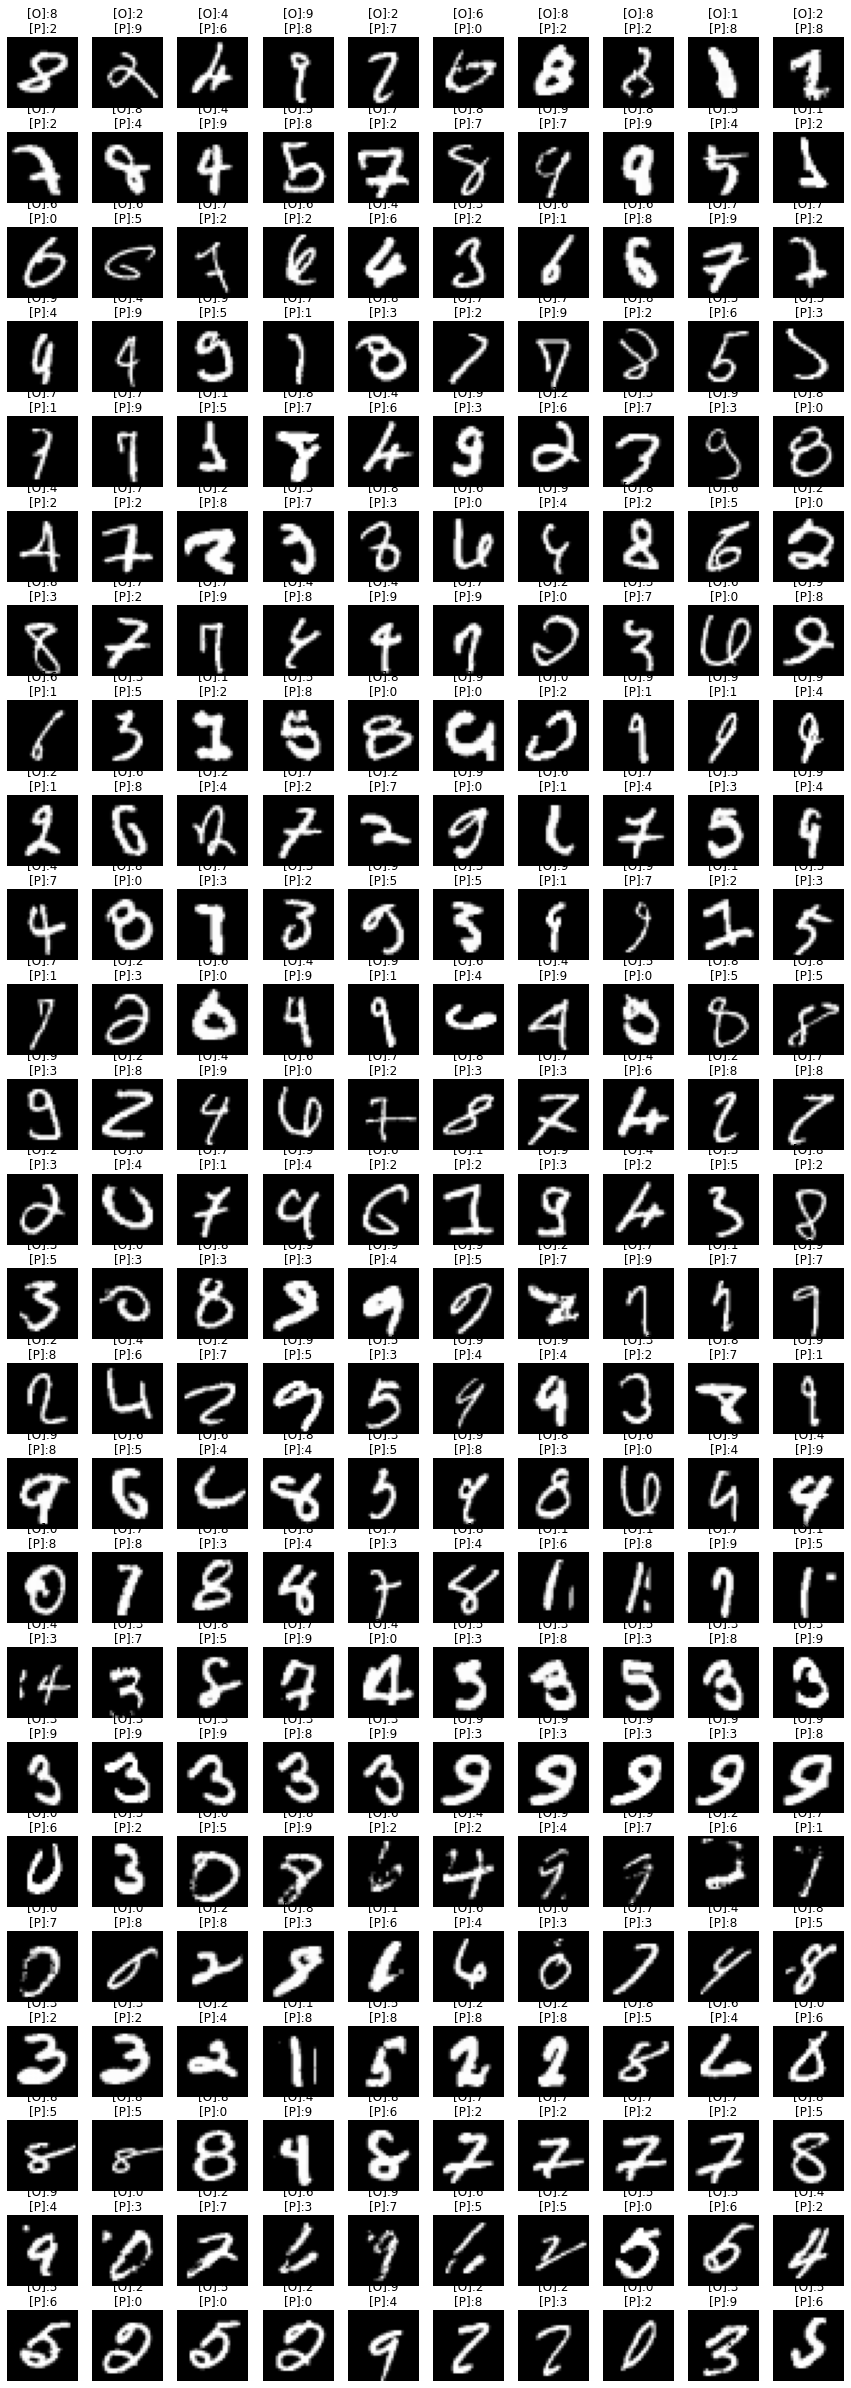

In [12]:
import numpy as np
# 找出True(預測錯誤)的位置
idx = np.nonzero(pre != y_test)[0] #用nonzero來比對pre(預測)與y_test(答案),下面有示範,如果是二維陣列會分開存x座標&y座標
pre_false_label = y_test[idx] #錯誤的正確答案
pre_false_pre = pre[idx] #錯誤時預測的答案
pre_false_img = x_test[idx] #錯誤時照片的像素

plt.figure(figsize=(15, 45)) #畫布大小
width = 10 #10列
height = len(idx) // width + 1 #幾行? > 總數量/10個一列 +1(多加一行)
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(pre_false_label[i], pre_false_pre[i]) #標題>O:原始答案 P:預測答案
    plt.title(t)
    plt.axis("off") #把畫布的axis刻度關掉
    plt.imshow(pre_false_img[i], cmap="gray")
# 結論：MLP是使用圖片數值來判定數字的辨識依據，沒有認識形狀再做判定 > 非人類的判定方式

In [13]:
test = np.array([
    [1, 0],
    [2, 0]
])
np.nonzero(test) #找到是0的地方,array[0]是x座標,array[1]是y座標,所以是[0,0]&[1,0]的地方非0
#下面直接整理成單一位的x,y座標,先用*把cuple裡面的值散開，用zip重組,最後格式用list
list(zip(*np.nonzero(test)))
#如果不用*的寫法:
list(zip(np.nonzero(test)[0],np.nonzero(test)[1]))

[(0, 0), (1, 0)]